In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# for row in session.query(Measurement, Measurement.date):
#     print(row)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


2016-08-23


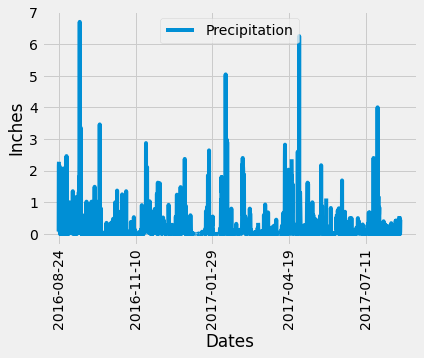

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year)

# Perform a query to retrieve the data and precipitation scores
new_section = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year).\
    order_by(Measurement.date).all()

# # Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(new_section,columns=['Dates', 'Precipitation'])

# # Sort the dataframe by date
df.sort_values('Dates')

# # Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Dates',y='Precipitation',ylabel='Inches',rot=90)
plt.show()



In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Measurement).group_by(Measurement.station).count()
print(stations)

9


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs).filter(Measurement.station=='USC00519281')).all()

[(53.0, 87.0, 71.66378066378067)]

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(Measurement.id, Measurement.tobs).\
    filter(Measurement.station=='USC00519281').\
    order_by(Measurement.station).all()

In [20]:
d_f = pd.DataFrame(temp,columns=['Frequency', 'Temperature'])

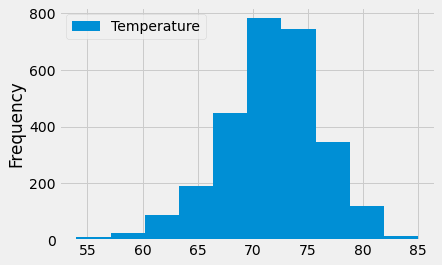

In [26]:
d_f.plot(kind='hist',x='Frequency',y='Temperature' ,xlabel='Temperature', ylabel='Frequency')
plt.show()

# Close session

In [27]:
# Close Session
session.close()